In [2]:
#הגדרות

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

N = 1500
S = 1.5 * np.ones(N)
R = 1.2 * np.ones(N)

# מצב 1: S קבוע R יורד
R[50:75] = np.linspace(1.2, 1.0, 25)
R[75:100] = 1.0
R[100:125] = np.linspace(1.0, 1.2, 25)

# מצב 2: S יורד R קבוע
S[200:225] = np.linspace(1.5, 1.3, 25)
S[225:250] = 1.3
S[250:275] = np.linspace(1.3, 1.5, 25)

# מצב 3:    S עולה R קבוע
S[325:350] = np.linspace(1.5, 1.7, 25)
S[350:375] = 1.7
S[375:400] = np.linspace(1.7, 1.5, 25)

# מצב 4:    S קבוע R עולה
R[450:475] = np.linspace(1.2, 1.4, 25)
R[475:500] = 1.4
R[500:525] = np.linspace(1.4, 1.2, 25)

# מצב 5:   S יורד R יורד
S[575:600] = np.linspace(1.5, 1.3, 25)
S[600:625] = 1.3
S[625:650] = np.linspace(1.3, 1.5, 25)
R[575:600] = np.linspace(1.2, 1.0, 25)
R[600:625] = 1.0
R[625:650] = np.linspace(1.0, 1.2, 25)

# מצב 6:    S עולה R עולה
S[700:725] = np.linspace(1.5, 1.7, 25)
S[725:750] = 1.7
S[750:775] = np.linspace(1.7, 1.5, 25)
R[700:725] = np.linspace(1.2, 1.4, 25)
R[725:750] = 1.4
R[750:775] = np.linspace(1.4, 1.2, 25)

# מצב 7:    S עולה R יורד
S[850:875] = np.linspace(1.5, 1.7, 25)
S[875:900] = 1.7
S[900:925] = np.linspace(1.7, 1.5, 25)
R[850:875] = np.linspace(1.2, 1.0, 25)
R[875:900] = 1.0
R[900:925] = np.linspace(1.0, 1.2, 25)

# מצב 8:    S יורד R עולה
S[1000:1025] = np.linspace(1.5, 1.3, 25)
S[1025:1050] = 1.3
S[1050:1075] = np.linspace(1.3, 1.5, 25)
R[1000:1025] = np.linspace(1.2, 1.4, 25)
R[1025:1050] = 1.4
R[1050:1075] = np.linspace(1.4, 1.2, 25)

# מצב 9:    S עולה מהר R עולה לאט
S[1150:1160] = np.linspace(1.5, 1.8, 10)
S[1160:1190] = 1.8
S[1190:1200] = np.linspace(1.8, 1.5, 10)
R[1150:1175] = np.linspace(1.2, 1.5, 25)
R[1175:1190] = 1.5
R[1190:1215] = np.linspace(1.5, 1.2, 25)

# מצב 10:   S עולה לאט R עולה מהר
S[1250:1275] = np.linspace(1.5, 1.8, 25)
S[1275:1290] = 1.8
S[1290:1315] = np.linspace(1.8, 1.5, 25)
R[1250:1260] = np.linspace(1.2, 1.5, 10)
R[1260:1290] = 1.5
R[1290:1300] = np.linspace(1.5, 1.2, 10)

# מצב 11:   S יורד מהר R יורד לאט
S[1350:1360] = np.linspace(1.5, 1.2, 10)
S[1360:1390] = 1.2
S[1390:1400] = np.linspace(1.2, 1.5, 10)
R[1350:1375] = np.linspace(1.2, 0.9, 25)
R[1375:1390] = 0.9
R[1390:1415] = np.linspace(0.9, 1.2, 25)

# מצב 12:   S יורד לאט R יורד מהר
S[1425:1450] = np.linspace(1.5, 1.2, 25)
S[1450:1475] = 1.2
S[1475:1500] = np.linspace(1.2, 1.5, 25)
R[1425:1435] = np.linspace(1.2, 0.9, 10)
R[1435:1475] = 0.9
R[1475:1485] = np.linspace(0.9, 1.2, 10)

In [ ]:
#חישובים

i=0
d_calibration=1
RATIO=[]
N_RATIO=[]
D_N_RATIO=[]
ALARM=[]
D_ALARM=[]
S_DIFF=[]
R_DIFF=[]
r_diff=0
s_diff=0
for i in range (N):

    ratio=S[i]/R[i]
    if i==0:
        z_calibration=ratio

    if i>0:
        s_diff=S[i]-S[i-1]
        r_diff=R[i]-R[i-1]
        S_DIFF.append(s_diff)
        R_DIFF.append(r_diff)
       
   
    n_ratio=ratio/z_calibration
    RATIO.append(ratio)
    N_RATIO.append(n_ratio)
   
    if abs(r_diff)>0 and(s_diff==0):
        d_calibration=n_ratio
    # else:
    #      d_calibration=1
   
    D_N_RATIO.append(n_ratio/d_calibration)

    if (n_ratio<1):
        ALARM.append(0.3)
    else:
        ALARM.append(0)

    if (n_ratio/d_calibration<1):
        D_ALARM.append(0.3)
        #print(i)
    else:
        D_ALARM.append(0)
   

import matplotlib.pyplot as plt



In [ ]:
#חישובים 2

epsilon = 1e-3  # סף לרגישות לשינויים קטנים (למשל רעש מדידה)

# נירמול ראשוני
S0 = S[0]
R0 = R[0]
z_calibration = S0 / R0
d_calibration = 1

# איפוס משתנים
RATIO = []
N_RATIO = []
D_N_RATIO = []
ALARM = []
D_ALARM = []

for i in range(N):
    ratio = S[i] / R[i]
    n_ratio = ratio / z_calibration

    if i > 0:
        # שינויים מקומיים וגלובליים
        local_s_diff = S[i] - S[i-1]
        local_r_diff = R[i] - R[i-1]
        global_s_diff = S[i] - S0
        global_r_diff = R[i] - R0

        # === ALARM רגיל ===
        if global_s_diff < 0:  # ירידה ב-S
            if abs(global_r_diff) < epsilon:
                ALARM.append(0.6)  # גז
            elif global_r_diff < 0:
                if ratio > 1:
                    ALARM.append(0.2)  # הפרעה
                else:
                    ALARM.append(0.4)  # גז + הפרעה
            else:
                ALARM.append(0.4)  # גז או חוסר כיול

        elif global_s_diff > 0:  # עלייה ב-S
            if abs(S[i] - S0) < abs(S[i-1] - S0):
                ALARM.append(0)  # חזרה לנורמה
            else:
                ALARM.append(0.4)  # חריגה כלפי מעלה

        else:  # S קבוע
            if abs(global_r_diff) > epsilon:
                ALARM.append(0.2)  # אולי חוסר כיול
            else:
                ALARM.append(0)  # תקין

    else:
        ALARM.append(0)  # דגימה ראשונה

    # שמירה של היחסים
    RATIO.append(ratio)
    N_RATIO.append(n_ratio)

    # === D_ALARM עם כיול דינמי ===
    if i > 0:
        if local_s_diff < 0:
            if abs(local_r_diff) < epsilon:
                D_ALARM.append(0.6)  # גז – R קבוע
            elif local_r_diff < 0:
                if abs(n_ratio - 1) < epsilon:
                    D_ALARM.append(0)  # אין שינוי ביחס – הפרעה קלה
                elif n_ratio > 1 + epsilon:
                    D_ALARM.append(0.6)  # גז – יחס עלה
                elif n_ratio < 1 - epsilon:
                    d_calibration = n_ratio  # כיול מחדש
                    D_ALARM.append(0.2)
                else:
                    D_ALARM.append(0)
            else:
                D_ALARM.append(0.6)  # R עלה כש-S ירד – גם סימן לגז
        else:
            # S לא ירד – כיול מחדש תמיד
            d_calibration = n_ratio
            if n_ratio / d_calibration < 1:
                D_ALARM.append(0.3)
            else:
                D_ALARM.append(0)
    else:
        D_ALARM.append(0)  # דגימה ראשונה


In [ ]:
#חישובים 3
segment_indices = [
    (50, 125), (200, 275), (325, 400), (450, 525), (575, 650),
    (700, 775), (850, 925), (1000, 1075), (1150, 1215),
    (1250, 1315), (1350, 1415), (1450, 1500)
]

epsilon = 1e-3
S0 = S[0]
R0 = R[0]
z_calibration = S0 / R0

RATIO = []
N_RATIO = []
ALARM = np.zeros(N)

# s_diff < -epsilon = ירידה בS
# s_diff > epsilon = עלייה בS
# abs(s_diff) < epsilon =   אין שינוי מהותי ב S      


def classify_static(s_diff, r_diff, n_ratio, epsilon=1e-3):
    # החלטה מבוססת על מצב התחלתי של האינטרוול
    if s_diff < -epsilon:
        if abs(r_diff) < epsilon:
            return 0.6  # גז ברור
        elif r_diff < -epsilon:
            if abs(n_ratio - 1) < epsilon:
                return 0.2  # הפרעה פרופורציונלית
            elif n_ratio > 1 + epsilon:
                return 0.4
            else:
                return 0.2
        elif r_diff > epsilon:
            return 0.6
    elif s_diff > epsilon:
        if abs(r_diff) < epsilon:
            return 0.2
        elif r_diff > epsilon:
            if abs(n_ratio - 1) < epsilon:
                return 0.2
            elif n_ratio > 1 + epsilon:
                return 0.4
            else:
                return 0.2
        elif r_diff < -epsilon:
            if n_ratio > 1 + epsilon:
                return 0.6
            elif abs(n_ratio - 1) < epsilon:
                return 0.4
            else:
                return 0.2
    else:
        if abs(r_diff) > epsilon:
            return 0.2
        else:
            return 0
    return 0.2

# חישוב ratio ונירמול
for i in range(N):
    ratio = S[i] / R[i]
    RATIO.append(ratio)
    N_RATIO.append(ratio / z_calibration)

# שלב 2: קביעת התראה לכל אינטרוול לפי התחלה שלו
for start, end in segment_indices:
    delta_s = S[start + 1] - S[start]
    delta_r = R[start + 1] - R[start]
    n_ratio = (S[start] / R[start]) / z_calibration
    alarm_value = classify_static(delta_s, delta_r, n_ratio, epsilon)
    ALARM[start:end] = alarm_value


NameError: name 'S' is not defined

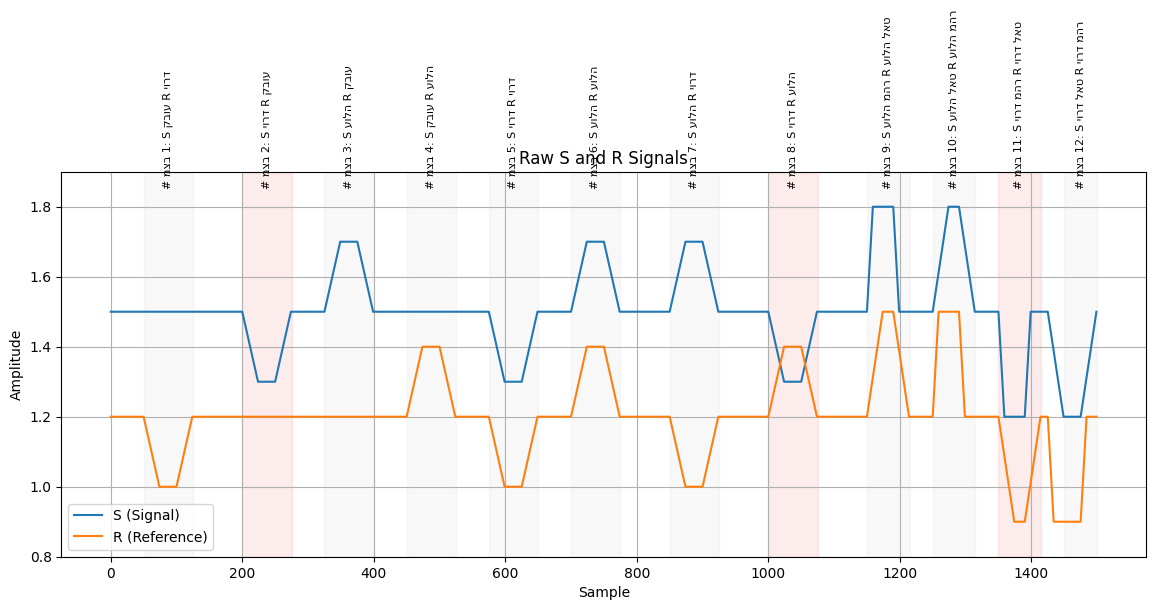

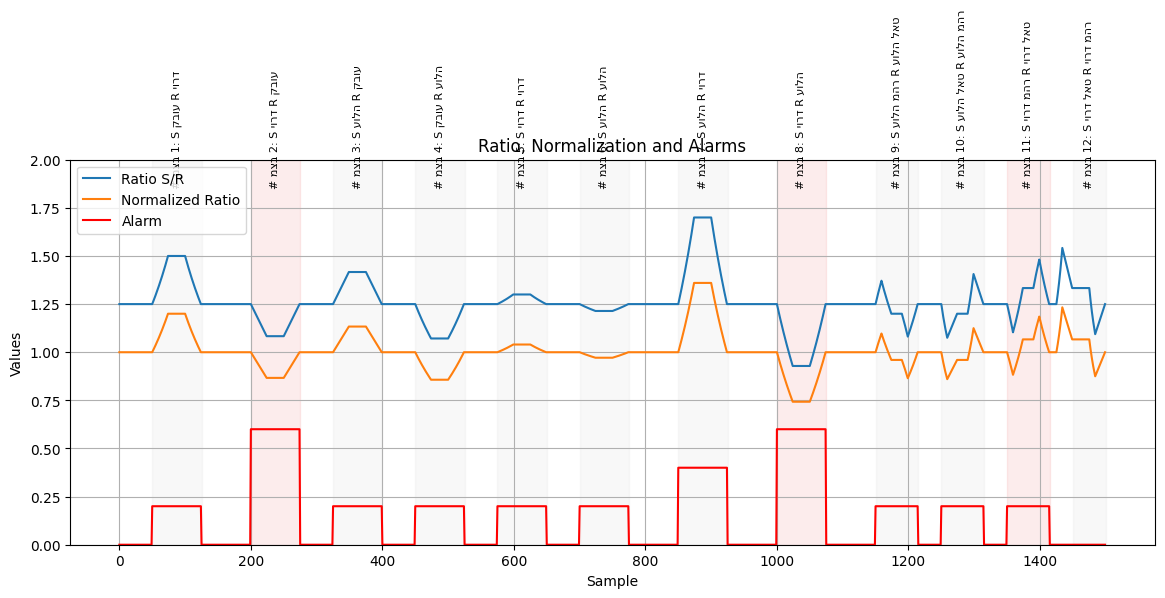

NameError: name 'S_norm' is not defined

<Figure size 1400x500 with 0 Axes>

In [6]:
# גרפים
segment_indices = [
    (50, 125), (200, 275), (325, 400), (450, 525), (575, 650),
    (700, 775), (850, 925), (1000, 1075), (1150, 1215),
    (1250, 1315), (1350, 1415), (1450, 1500)
]

state_labels = [
    "# מצב 1: S קבוע R יורד", "# מצב 2: S יורד R קבוע", "# מצב 3: S עולה R קבוע", "# מצב 4: S קבוע R עולה",
    "# מצב 5: S יורד R יורד", "# מצב 6: S עולה R עולה", "# מצב 7: S עולה R יורד", "# מצב 8: S יורד R עולה",
    "# מצב 9: S עולה מהר R עולה לאט", "# מצב 10: S עולה לאט R עולה מהר", "# מצב 11: S יורד מהר R יורד לאט",
    "# מצב 12: S יורד לאט R יורד מהר"
]


# אינדקסים התחלתיים של כל מצב


# פונקציה להוספת קווי הפרדה ותיוג למצבים
def plot_segments():
    red_segments = [1, 7, 10]  # אינדקסים של המצבים בצבע אדום

    for i, ((start, end), label) in enumerate(zip(segment_indices, state_labels)):
        color = 'lightcoral' if i in red_segments else 'lightgray'
        plt.axvspan(start, end, color=color, alpha=0.15)
        plt.text((start + end)//2, 1.85, label, ha='center', va='bottom', fontsize=8, rotation=90)

# גרף 1 - מהלך האותות הגולמיים
plt.figure(figsize=(14, 5))
plt.plot(S, label='S (Signal)')
plt.plot(R, label='R (Reference)')
plot_segments()
plt.title('Raw S and R Signals')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.ylim([0.8, 1.9])
plt.legend()
plt.grid()
plt.show()

# גרף 2 - חישובי היחסים וההתראות
plt.figure(figsize=(14, 5))
plt.plot(RATIO, label='Ratio S/R')
plt.plot(N_RATIO, label='Normalized Ratio')
#plt.plot(D_N_RATIO, label='Dynamic Normalized Ratio')
plt.plot(ALARM, 'r', label='Alarm')
#plt.plot(D_ALARM, 'r--', label='Dynamic Alarm')
plot_segments()
plt.title('Ratio, Normalization and Alarms')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.ylim([0, 2])
plt.legend()
plt.grid()
plt.show()

# גרף 3 - נירמול עצמי של S ו-R והיחס ביניהם
plt.figure(figsize=(14,5))
plt.plot(S_norm, label='S Normalized')
plt.plot(R_norm, label='R Normalized')
plt.plot(S_norm/R_norm, label='S_norm / R_norm')
plot_segments()
plt.title('Self-normalized S and R and Their Ratio')
plt.xlabel('Sample')
plt.ylabel('Normalized Amplitude')
plt.ylim([0.8, 1.9])
plt.legend()
plt.grid()
plt.show()